In [ ]:
import numpy as np

In [ ]:
X = np.array([[160], [165], [168], [171], [174], [179], [181], [188], [191], [200]])
X

array([[160],
       [165],
       [168],
       [171],
       [174],
       [179],
       [181],
       [188],
       [191],
       [200]])

In [ ]:
Y = np.array([[64], [67], [70], [80], [77], [81], [87], [94], [101], [112]])
Y

array([[ 64],
       [ 67],
       [ 70],
       [ 80],
       [ 77],
       [ 81],
       [ 87],
       [ 94],
       [101],
       [112]])

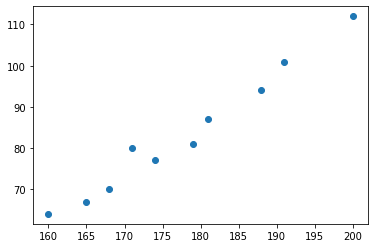

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, Y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression()

In [ ]:
regressor.intercept_

array([-131.66431941])

In [ ]:
regressor.coef_

array([[1.20970354]])

In [ ]:
previsao = regressor.predict(np.array([190]).reshape(1,1))
previsao

array([[98.17935357]])

In [ ]:
previsao = regressor.predict(X)
previsao

array([[ 61.88824731],
       [ 67.93676502],
       [ 71.56587564],
       [ 75.19498627],
       [ 78.82409689],
       [ 84.8726146 ],
       [ 87.29202169],
       [ 95.75994648],
       [ 99.38905711],
       [110.27638899]])

In [ ]:
diff = (Y - previsao)
diff

array([[ 2.11175269],
       [-0.93676502],
       [-1.56587564],
       [ 4.80501373],
       [-1.82409689],
       [-3.8726146 ],
       [-0.29202169],
       [-1.75994648],
       [ 1.61094289],
       [ 1.72361101]])

In [ ]:
diff = abs(Y - previsao)
diff

array([[2.11175269],
       [0.93676502],
       [1.56587564],
       [4.80501373],
       [1.82409689],
       [3.8726146 ],
       [0.29202169],
       [1.75994648],
       [1.61094289],
       [1.72361101]])

In [ ]:
diff = abs(Y - previsao).mean()
diff

2.0502640659108606

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_ae = mean_absolute_error(Y, previsao)
mean_ae

2.0502640659108606

In [ ]:
mse = mean_squared_error(Y, previsao)
mse

5.795028519118367

Text(0, 0.5, 'Peso')

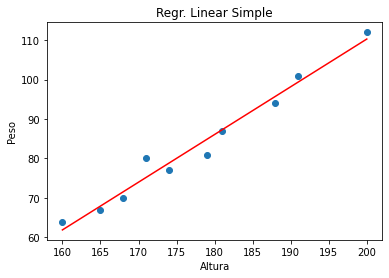

In [ ]:
plt.plot(X, Y, 'o')
plt.plot(X, previsao, color = 'red')
plt.title("Regr. Linear Simple")
plt.xlabel("Altura")
plt.ylabel("Peso")

In [ ]:
#logisticregression
import pandas as pd
base = pd.read_csv("adult.csv")

In [ ]:
base

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
base.shape

(32561, 15)

In [ ]:
base['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [ ]:
X = base.iloc[:, 0:14].values
y = base.iloc[:,14].values

In [ ]:
X

array([[90, '?', 77053, ..., 4356, 40, 'United-States'],
       [82, 'Private', 132870, ..., 4356, 18, 'United-States'],
       [66, '?', 186061, ..., 4356, 40, 'United-States'],
       ...,
       [40, 'Private', 154374, ..., 0, 40, 'United-States'],
       [58, 'Private', 151910, ..., 0, 40, 'United-States'],
       [22, 'Private', 201490, ..., 0, 20, 'United-States']], dtype=object)

In [ ]:
y

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X[0]

array([90, '?', 77053, 'HS-grad', 9, 'Widowed', '?', 'Not-in-family',
       'White', 'Female', 0, 4356, 40, 'United-States'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
X[:,1] = label_encoder.fit_transform(X[:,1])
X[:,3] = label_encoder.fit_transform(X[:,3])
X[:,5] = label_encoder.fit_transform(X[:,5])
X[:,6] = label_encoder.fit_transform(X[:,6])
X[:,7] = label_encoder.fit_transform(X[:,7])
X[:,8] = label_encoder.fit_transform(X[:,8])
X[:,9] = label_encoder.fit_transform(X[:,9])
X[:,13] = label_encoder.fit_transform(X[:,13])

In [ ]:
X[0]

array([90, 0, 77053, 11, 9, 6, 0, 1, 4, 0, 0, 4356, 40, 39], dtype=object)

In [ ]:
# colocando na msm escala
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [ ]:
X[0]

array([ 3.76961234, -2.65732045, -1.06799736,  0.18133163, -0.42005962,
        2.24948009, -1.55428326, -0.27780504,  0.39366753, -1.42233076,
       -0.14592048, 10.59350656, -0.03542945,  0.29156857])

In [ ]:
# test/train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
y_test.shape

(6513,)

In [ ]:
from sklearn.linear_model import LogisticRegression

classificador = LogisticRegression(max_iter = 12000)
classificador.fit(X_train, y_train)

LogisticRegression(max_iter=12000)

In [ ]:
prev = classificador.predict(X_test)
prev

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
y_test

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
tx_acerto = accuracy_score(y_test, prev)
tx_acerto

0.8246583755565792

In [ ]:
#kmeans
x = [21, 23, 27, 32, 34, 41, 50, 53, 57, 59, 38, 46, 48, 48, 60]
y = [1000, 1100, 1250, 1500, 1350, 1700, 2000, 2900, 3500, 2200, 1800, 1100, 5000, 4400, 3000]

In [ ]:
import plotly.express as px

In [ ]:
graf = px.scatter(x=x, y=y)
graf.show()

In [ ]:
base_salario = np.array([[21, 1000], [23, 1100], [27, 1250], [32, 1500],
                         [34, 1350], [38, 1800], [41, 1700], [46, 1100],
                         [48, 4400], [48, 5000], [50, 2000], [53, 2900],
                         [57, 3500], [59, 2200], [60, 3000]])
base_salario

array([[  21, 1000],
       [  23, 1100],
       [  27, 1250],
       [  32, 1500],
       [  34, 1350],
       [  38, 1800],
       [  41, 1700],
       [  46, 1100],
       [  48, 4400],
       [  48, 5000],
       [  50, 2000],
       [  53, 2900],
       [  57, 3500],
       [  59, 2200],
       [  60, 3000]])

In [ ]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)
base_salario

array([[-1.72769059, -1.03768468],
       [-1.56672563, -0.95489069],
       [-1.24479571, -0.8306997 ],
       [-0.8423833 , -0.62371473],
       [-0.68141834, -0.74790571],
       [-0.35948842, -0.37533276],
       [-0.11804097, -0.45812675],
       [ 0.28437143, -0.95489069],
       [ 0.4453364 ,  1.77731099],
       [ 0.4453364 ,  2.27407494],
       [ 0.60630136, -0.20974478],
       [ 0.8477488 ,  0.53540114],
       [ 1.16967872,  1.03216508],
       [ 1.33064369, -0.04415679],
       [ 1.41112617,  0.61819513]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_salario = KMeans(n_clusters = 3)
kmeans_salario.fit(base_salario)

KMeans(n_clusters=3)

In [ ]:
centroide = kmeans_salario.cluster_centers_
centroide

array([[ 1.07309975,  0.38637196],
       [-0.78202144, -0.74790571],
       [ 0.4453364 ,  2.02569297]])

In [ ]:
scaler_salario.inverse_transform(kmeans_salario.cluster_centers_)

array([[  55.8 , 2720.  ],
       [  32.75, 1350.  ],
       [  48.  , 4700.  ]])

In [ ]:
rotulos = kmeans_salario.labels_
rotulos

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
grafico1 = px.scatter(x = base_salario[:, 0],
                     y = base_salario[:, 1],
                     color = rotulos)

In [ ]:
grafico2 = px.scatter(x = centroide[:, 0],
                     y = centroide[:, 1],
                     size = [8, 8, 8])

In [ ]:
import plotly.graph_objects as go 

grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

In [ ]:
#SVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd

dados = pd.read_csv('Social_Network_Ads.csv')
dados

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
dados['Purchased'].unique()

array([0, 1])

In [ ]:
X = dados[['Age', 'EstimatedSalary']]
y = dados['Purchased']

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
svm = SVC(((kernel = 'rbf',#kernel = 'sigmoid', #kernel = 'linear', 
            random_state = 1, C = 1.0)
svm.fit(X_train, y_train)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)